# Evaluation and Multi-Layer Perceptron

## Preparation
###  Business Case Explanation
(mostly the same processes as from lab four) Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the task is and what parties would be interested in the results. How well would your prediction algorithm need to perform to be considered useful by interested parties?

### Introduction to Our Problem
There are literally tens of thousands of movies out there today. While some do great at the box office and bring in a lot of money, others flop making only a fraction compared to the top hits. What if we had a scientific way of accurately predicting how much revenue a movie would generate over its lifetime? Well, through machine learning we believe that we actually can!

The dataset we are using is found on <a href="https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset">Kaggle</a>. It consists of 5000+ movies scraped from the review site IMDB. There is quite a bit of data recorded for each movie and so we had a lot to work with to try to predict the next big hit. The data was collected from web scraping IMDB using a python library called "scrappy" to collect all of the data below. The features recorded for each movie are: 

Basic Info:
- movie title
- color (black and white or color)	
- duration of the movie
- director name
- gross (total revenue)
- genres (a lits of different genres ascribed to the movie)
- number of faces in movie poster
- language of the movie
- country the movie was produced in
- content rating (G, PG, PG-13, R, NC-17)
- budget
- year of release
- aspect ratio
- name of the 3rd actor
- name of the 2nd actor
- name of the 1st actor

Facebook Info:
- number of director facebook likes
- number of facebook likes for the whole cast
- number of the movie's facebook likes
- number of the 3rd actor's facebook likes
- number of the 2nd actor's facebook likes
- number of the 1st actor's facebook likes

IMDB Specific Info:
- number of imdb users who rated the movie
- number of critical reviews for the movie
- number of users who left a review
- imdb score
- top plot keywords


With all of this data collected on so many movies, we hope to be able to use this to build out a multi-layer perceptron  to accurately predict the financial success (measured in categories of gross revenue: low, low-mid, high-mid, and high) of a movie. We think that this could be a useful tool to anyone in the movie industry who is concerned with making a profit on their movie. It could also help a producer understand which of these features are the most important to an accurate prediction, what content rating is most important, how budget affects outcome, etc.


We believe that the algorithm would have to predict with a relatively low cost (under ~30) to be found useful by movie directors, producers, etc. 

### Defining and Preparing Class Variables

### Data Pre-processing:
We made a number of changes to both the original csv obtained from kaggle before we loaded it and to the data once it was loaded in.


Pre-processing of the CSV:
- We first removed the imdb link from the csv because we knew we would never need to use that (**Note: this was the only feature removed from the csv**)
- We then went through and deleted all of the movies that were made in another country (foriegn films) we did this because we wanted to just look at American films, also because the currency units for those countries (for budget and gross) were in native currency units, not USD, and with changing exchange rates, it's not very easy to compare across countries.
- We then went through and converted all 0 values for gross, movie_facebook_likes, and director_facebook_likes to a blank value in the csv (so that it is read in as NaN by pandas), this is so that we cna more easily impute values later. Note: according to the description on the kaggle entry, because of the way the data was scraped, some movies had missing data. The Python scraper just made these values into a 0 instead of NaN.
- We then removed all movies with an undefined gross. Being the feature we are trying to predict, we should not be imputing values for gross to train our model. That will basically reduce our model to an imputation algorithm...
- We then removed all movies that were made before 1935. We did this because there were only a handful of movies ranging from 1915 to 1935, the way we are classifying budget (described below) would not work with a small sample of movies from that time period. We could have cut this number at a different year (say 1960), but we didn't want to exclude such classics as "Bambi" or "Gone With the Wind"
- Lastly, we had to adjust the gross revenue and budget values for inflation, since the movies spanned many years. For adjusting for inflation we obtained a csv of consumer price index (CPI) for every month since 1947. To simplify, we just took the value for January of that year to use for the whole year. We then took the CPI and calculated the ratio per year compared to 2017 dollars. We then took the budget and gross and multiplied them out with their appropriate ratio value. We then exported this to the csv that we use for the rest of this lab. **NB:** This was done outside of this notebook because this whole process took a very long time when it was included in the notebook when done every time.

Pre-processing of the Data:
- After the above steps, we made more edits to the data using pandas. First, we removed features that we thought would be un-useful to our prediction algorithm. We removed all features concerning facebook likes. We did this because a significant portion of the movies in the training set debuted before facebook was invented and widely adopted. While some of these movies have received retroactive "likes" on facebook, only the most famous classics received a substantial amount of retraoctive "likes". Most lesser known films received very low amounts of "likes" (presumably because modern movie watchers don't really care to search for lesser known movies on facebook, or because the movie doesn't have a facebook). For this reason we decided to remove movie_facebook_likes
- Likewise, we removed the other "likes" for the same reasons as above. For example, the esteemed director George Lucas has a total of 0 "likes" between all of his films. This feature obviously would not help us predict the profitability of movies.
- We also removed irrelevant information such as aspect_ratio, language, and country. Because we deleted all foreign films the country will always be USA. A simple filter of the data reveals that there are no more than 20 movies made in the US that use a language other than English, therefore there is not enough data to use language as training feature. However, we did not delete the movies in a different language, because most of them were famous films such as *Letters from Iwo Jima* and *The Kite Runner*. We still count them as a valuable part of the dataset, just don't find the language of particular value. Lastly, we removed aspect_ratio because that seems to be unimportant for predicting the success of a movie.
- Lastly, we removed other features that would be difficult to use in our machine learning model such as actor names and plot keywords. We initially tried to include these in our model using one-hot encoding, but the resultant array was so enormous that the model would take a very, very long time to train.

#### Importing Time and Memory Profiler, Reading in Data
Below we import a memory profiler to use later on in this notebook, along with reading in the movie data as discussed above. The unneccesary features are dropped out of the data frame.

In [75]:
%reload_ext memory_profiler
import timeit
from memory_profiler import memory_usage

In [15]:
# Take the dataframe and adjust for inflation and then use the df_to_csv function to export to csv 
# and then export to csv and then delete code

import pandas as pd
import numpy as np
df = pd.read_csv("inflation_corrected_dataset.csv")
for x in ['movie_facebook_likes', 'director_facebook_likes', 'actor_2_facebook_likes', 
          'actor_1_facebook_likes','actor_3_facebook_likes', 'cast_total_facebook_likes',
          'aspect_ratio', 'language', 'country', 'plot_keywords', 'actor_3_name', 'actor_2_name', 'movie_title', 'genres', 'color']:
    if x in df:
        del df[x]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 12 columns):
director_name             3222 non-null object
num_critic_for_reviews    3219 non-null float64
duration                  3221 non-null float64
gross                     3222 non-null int64
actor_1_name              3220 non-null object
num_voted_users           3222 non-null int64
facenumber_in_poster      3216 non-null float64
num_user_for_reviews      3221 non-null float64
content_rating            3196 non-null object
budget                    3062 non-null float64
title_year                3222 non-null int64
imdb_score                3222 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 302.1+ KB
None


Below we group the columns by director_name and then impute as many values as we can, dropping the rows where we can't impute.

In [16]:
# Tamper with the groupings to improve imputations? How do we improve how many values get imputed?
df_grouped = df.groupby(by=['director_name'])
# director_name adds about 50 rows (imputes about 50 rows and then deletes about 100)

In [17]:
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
col_deleted = list( set(df.columns) - set(df_imputed.columns)) #in case the median op deleted columns
df_imputed[col_deleted] = df[col_deleted]

# drop rows that still have missing values after imputation
df_imputed.dropna(inplace=True)
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3127 entries, 0 to 3220
Data columns (total 12 columns):
num_critic_for_reviews    3127 non-null float64
duration                  3127 non-null float64
gross                     3127 non-null int64
num_voted_users           3127 non-null int64
facenumber_in_poster      3127 non-null float64
num_user_for_reviews      3127 non-null float64
budget                    3127 non-null float64
title_year                3127 non-null int64
imdb_score                3127 non-null float64
actor_1_name              3127 non-null object
content_rating            3127 non-null object
director_name             3127 non-null object
dtypes: float64(6), int64(3), object(3)
memory usage: 317.6+ KB
None


### Scaling the Data
Below we scale the data using the methods shown so as to not adversely affect the gamma value. We scaled down all of the numerical values to be within -1 and 1. We also one-hot encode the content rating. We forego encoding the director name or actor names because they proved to make our matrix way too large to run computations on.

In [18]:
%%time
#scaling budgets!
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 200)

budget = df_imputed['budget'].values.reshape(-1, 1)
df_imputed.reset_index(drop=True, inplace=True)
print("df: ",df_imputed.shape)

append_list = [df_imputed]

df = pd.concat(append_list, axis=1)

#one-hot encode
hot_content = pd.get_dummies(df_imputed.content_rating, prefix='contentRating')

print(df.shape)

df:  (3127, 12)
(3127, 12)
Wall time: 6.52 ms


### Cutting the gross into categories
Below we cut the adjusted, scaled, gross into 4 main categories: low, low-mid, high-mid, and high. We did this because otherwise the model would not be able to produce raw gross accurately. We also used the "qcut" function to evenly distribute the classes among the classifications, because when we did a normal cut method most of the classes would fall in the lowest category and throw off our predictions.

In [19]:
from sklearn.preprocessing import LabelEncoder

spacing = np.linspace(0, max(df['gross']), 100)
labels = []

labels = ["low", "low-mid", "high-mid", "high"]
df['gross_group'] = pd.qcut(df['gross'], 4, labels=labels)


rating_group = df['gross_group'].values
rating_encoder = LabelEncoder()
rating_df = pd.DataFrame(rating_encoder.fit_transform(rating_group), columns=['encoded_gross']).astype(str)
df = pd.concat([df, rating_df], axis=1)


___

## Evaluation
### Choosing Evaluation Metrics

For our dataset, accuracy is not the best evaluation metric, because that does not account properly for false positives. False positives for our business case are MUCH worse than a false negative. It would be very bad to predict that a movie will gross high, when in fact it grosses lowly. However, if we predict the movie will gross low, and it ends up grossing highly, that isn't as bad, because the director will either be pleasantly surprised, or he will choose to not undertake the filming in the first place. It is better to not film and miss out on the potential money, than to undertake the film thinking that it would be lucrative, when in fact it is not.

Because we are using a multi-class classification model we can not simply use precision, recall, or f1 score, but must construct a cost matrix with different weights that correspond to the different combination of predictions and results. Below we have our cost matrix defined. As you can see we weight a false positive with a 20 and a false negative with a 6. We give them this much of a cost difference because of the aforementioned reasons about false positives. Any True predictions are a negative one, and the other numbers in the matrix are scaled appropriately dependent upon how bad they would be as a result.

In [20]:
from sklearn.metrics import confusion_matrix

cost_matrix = np.array([-1,10, 14,20,2,-1,10,14,4,2,-1,10,6,4,2,-1]) #give a reason for why these numbers chosen
cost_matrix = cost_matrix.reshape(4,4)
print(cost_matrix)

[[-1 10 14 20]
 [ 2 -1 10 14]
 [ 4  2 -1 10]
 [ 6  4  2 -1]]


### Dividing up training/testing data
Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

For our dataset we want to use Stratified 10-fold cross validation because it is the best and works for our dataset well. Below we create the StratifiedKFold object and then use it many times later on in the lab. We selected this method instead of a simple 80/20 split because we new that we wanted to test on multiple randomized sets of data, instead of just the same one, so as to avoid data snooping and improper parameter tuning. We chose not to use the shuffle option becuase we wanted to compare our custom implementation and scikit-learn using the same indices for training and testing data. Below we also drop a few more fields that we no longer need due to categorizing the gross, etc.

In [21]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
cv = StratifiedKFold(n_splits=10)

drop_list = ['encoded_gross', 'gross_group', 
              'gross', 'director_name', 'actor_1_name', 'content_rating']
X = df.drop(drop_list, axis=1).values
y = df['encoded_gross'].values.astype(np.float) # x and y are now np.matrices 

X = StandardScaler().fit_transform(X)

___

## Modeling
### Creating Our Custom MLP
Below we have a number of classes and subclasses to form our custom MLP, this will allow for a sigmoide, linear, or relu nonlinearity and a quadratic or cross entropy cost function.

In [22]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30, nonlinear="sigmoid",
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.nonlinear = nonlinear
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot
    
    #Initialization used in RELU
    def _initialize_weights(self):
        if self.nonlinear == "linear":
            const1 = 6.
            const2 = 6.
        elif self.nonlinear == "sigmoid":
            const1 = 2.
            const2 = 2.
        elif self.nonlinear == "relu":
            const1 = 6.
            const2 = 2.
        """Initialize weights with small random numbers."""
        # suggested relu/sigmoid bounds
        # Glorot, Xavier, Antoine Bordes, and Yoshua Bengio. 
        #   "Deep Sparse Rectifier Neural Networks."
        init_bound = np.sqrt(const1 / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))

        init_bound = np.sqrt( const2 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1))
        return W1, W2
    
    @staticmethod
    def _relu(Z):
        return np.maximum(0,Z.copy())
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        if self.nonlinear == "sigmoid":  #A1->W1->Sigmoid->A2->W2->Sigmoid
            A2 = self._sigmoid(Z1)
        elif self.nonlinear == "linear": #A1->W1->Linear->A2->W2->Linear
            A2 = Z1
        elif self.nonlinear == "relu": #A1->W1->Relu->A2->W2->Sigmoid
            A2 = self._relu(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        if self.nonlinear == 'sigmoid' or self.nonlinear == 'relu':
            A3 = self._sigmoid(Z2)
        elif self.nonlinear == 'linear':
            A3 = Z2
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        if self.nonlinear == 'sigmoid': 
            sigma3 = -2*(Y_enc-A3)*A3*(1-A3)
            sigma2 = (W2.T @ sigma3)*A2*(1-A2)
        elif self.nonlinear == 'linear':
            sigma3 = -2*(Y_enc-A3)
            sigma2 = (W2.T @ sigma3)
        elif self.nonlinear == 'relu':
            sigma3 = (A3-Y_enc) 
            sigma2 = (W2.T @ sigma3) 
            Z1_with_bias = self._add_bias_unit(Z1,how='row')
            sigma2[Z1_with_bias<=0] = 0

        grad1 = sigma2[1:,:] @ A1
        grad2 = sigma3 @ A2.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [23]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                delta_W1, delta_W2 = self.eta * grad1, self.eta * grad2
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                delta_W1_prev, delta_W2_prev = delta_W1, delta_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self
    

In [24]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        sigma3 = (A3-Y_enc) # <- this is only line that changed
        if self.nonlinear == 'sigmoid':
            sigma2 = (W2.T @ sigma3)*A2*(1-A2)
        elif self.nonlinear == 'linear':
            sigma2 = (W2.T @ sigma3)
        elif self.nonlinear == 'relu':
            sigma2 = (W2.T @ sigma3) 
            Z1_with_bias = self._add_bias_unit(Z1,how='row')
            sigma2[Z1_with_bias<=0] = 0
        grad1 = sigma2[1:,:] @ A1
        grad2 = sigma3 @ A2.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
        

In [25]:
class TLPWrapper(object):
    def __init__(self, cost_func="quad",**kwds):
        self.cost_func = cost_func    #quad or cross_ent
        if self.cost_func == "cross_ent":
            self.neural = TLPMiniBatchCrossEntropy(**kwds)
        elif self.cost_func == "quad":
            self.neural = TLPMiniBatch(**kwds)
        else:
            print("Invalid cost function chosen. Pick either 'quad' or 'cross_ent'")
    def fit(self, x_train, y_train):
        self.neural.fit(x_train, y_train)
    def predict(self, x_test):
        return self.neural.predict(x_test)
            
    

### Tuning Hyper-Parameters
Below we will tune hyperparamters for our MLP in an attempt to get our model as reliable as possible.


#### Tuning Number of Neurons
Below we attempt to tune the amount of neurons in the hidden layer as a hyper-parameter. We range from 10 to 90 stepping up 10 neurons each time. We fit the MLP model to 10 different cross-validated training sets appending the resultant confusion matrix multiplied out by our cost matrix (described in the "Evaluation" section) into a list. This list is then fed into a boxplot which is displayed below. In doing this we hope to find which amount of hidden layer neurons makes for the best MLP.

In [26]:
%%time
#Tuning hidden neurons
hidden_confusion_list = []
neuron_list = []
for x in range(10, 100, 10):
    neuron_list.append(x)
    cross_ent_confusion = []
    vals = {'n_hidden': x, 
             'C':0.0, 'epochs':50, 'eta':0.001, 
             'alpha':0.0, 'decrease_const':1e-5, 'minibatches':128,
            'shuffle':True,'random_state':1, 'nonlinear': 'sigmoid'}
    for train_index, test_index in cv.split(X, y):

        X_train = X[train_index]
        X_test = X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        cross_ent_nn = TLPWrapper(cost_func="cross_ent", **vals)

        cross_ent_nn.fit(X_train, y_train)

        yhat = cross_ent_nn.predict(X_test)
        cross_ent_confusion.append(confusion_matrix(y_test, yhat)*cost_matrix)

    hidden_confusion_list.append(cross_ent_confusion)
    

Wall time: 2min 35s


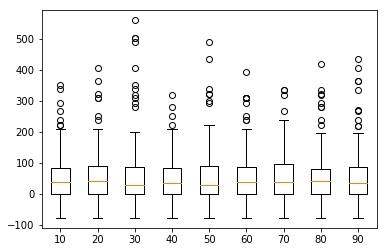

Medians of Neuron Sets: 
40.0
41.0
28.0
34.0
28.0
40.0
38.0
41.0
36.0


In [45]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(hidden_confusion_list, labels=neuron_list)
plt.show()

print("Medians of Neuron Sets: ")
for cost_conf in hidden_confusion_list:
    print(np.median(cost_conf))

Looking at the boxplot and numerical list of medians above you can see the variation in cost score per set of neurons. While there are not huge variations in the medians between all of these options, the MLP produced with 50 neurons has as low a median as the set with 30, but has fewer extreme outliers. For these reasons we find that our implementation of the MLP is best with 50 neurons. This is used below when we compare to the scikit-leanr implementation of an MLP.

#### Tuning using Various Nonlinearities
Below we attempt to find the best nonlinearity for our implementation of MLP. We run linear, sigmoid, and relu through 10 different cross validated datasets and append it onto a list which is displayed in the boxplot below. We also show the medians numerically. With this we hope to find the most effective nonlinearity for our implementation of MLP. We will compare this to scikit-learn later in this lab.

In [28]:
%%time
#Tuning nonlinearity function
nonlinear_confusion_list = []
nonlinear_list = ['linear', 'sigmoid', 'relu']
for x in nonlinear_list:
    cross_ent_confusion = []
    vals = {'n_hidden': 100, 
             'C':0.0, 'epochs':50, 'eta':0.001, 
             'alpha':0.0, 'decrease_const':1e-5, 'minibatches':128,
            'shuffle':True,'random_state':1, 'nonlinear': x}
    for train_index, test_index in cv.split(X, y):

        X_train = X[train_index]
        X_test = X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        cross_ent_nn = TLPWrapper(cost_func="cross_ent", **vals)

        cross_ent_nn.fit(X_train, y_train)

        yhat = cross_ent_nn.predict(X_test)
        cross_ent_confusion.append(confusion_matrix(y_test, yhat) * cost_matrix)

    nonlinear_confusion_list.append(cross_ent_confusion)
    

C:\ProgramFiles\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log


Wall time: 1min 1s


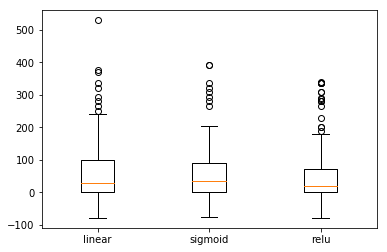

Median of linear:  28.0
Median of sigmoid:  35.0
Median of reul:  20.0


In [53]:
plt.figure()
plt.boxplot(nonlinear_confusion_list, labels=nonlinear_list)
plt.show()

print("Median of linear: ", np.median(nonlinear_confusion_list[0]))
print("Median of sigmoid: ", np.median(nonlinear_confusion_list[1]))
print("Median of reul: ", np.median(nonlinear_confusion_list[2]))

Above you can see that relu performed significantly better than linear and sigmoid. Its median was a full 8 points lower than that of linear and 15 points lower than sigmoid. Its top whisker and outliers are all lower down than the other two methods. Because of these things we believe that relu is the best nonlinearity for our implementation of MLP.

### Comparing Custom MLP to scikit-learn
Here we compare scikit-learn's MLP model to our custom implementation.

#### Scikit-Learn
Below we have the implementation from scikit-learn. We also run this on the same cross-validated data. Later we compare the result to our top custom implementation.

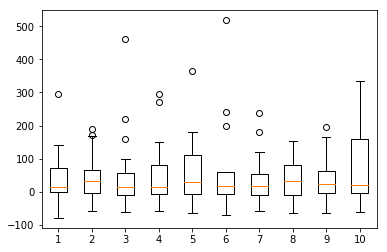

Wall time: 2.7 s


In [138]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
sk_confusion = []
sk_confusion_compare = []
clf = MLPClassifier(hidden_layer_sizes=(50, ), 
                    activation='relu', # type of non-linearity, every layer
                    solver='sgd', 
                    alpha=1e-4, # L2 penalty
                    batch_size= 'auto', # min of 200, num_samples
                    learning_rate='constant', # adapt learning? only for sgd
                    learning_rate_init=0.1, # only SGD
                    power_t=0.0,    # only SGD with inverse scaling of learning rate
                    max_iter=75, # stopping criteria
                    shuffle=True, 
                    random_state=1, 
                    tol=0, # for stopping
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, # only SGD
                    nesterovs_momentum=False, # only SGD
                    early_stopping=False, 
                    validation_fraction=0.0, # only if early_stop is true
                    beta_1=0.9, # adam decay rate of moment
                    beta_2=0.999, # adam decay rate of moment
                    epsilon=1e-08) # adam numerical stabilizer

def run_scikit(X, y):
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train,y_train)
        yhat = clf.predict(X_test)
        sk_confusion.append(confusion_matrix(y_test, yhat) * cost_matrix) 
    sk_confusion_compare.append(sk_confusion)

start = timeit.default_timer()
mem_scikit = memory_usage((run_scikit, (X, y)))  
stop = timeit.default_timer()
time_scikit = stop - start

plt.figure()
plt.boxplot(sk_confusion)
plt.show()

From the boxplot above you can see the variation in performance with the variation in the cross-validated splits. Let's combine all of those together to get one boxplot of the performance to compare to our implementation.

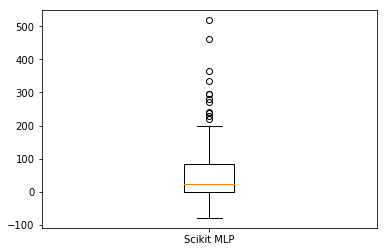

Median of Scikit:  22.0


In [146]:
plt.figure()
plt.boxplot(sk_confusion_compare, labels=["Scikit MLP"])
plt.show()

print("Median of Scikit: ", np.median(sk_confusion_compare))

#### Our Best Shot
Wow! That was a pretty good try from scikit-learn. Now we will attempt our best implementation as we determined in the parameter-tuning section above. We use relu as the nonlinearity and a set of 50 neurons.

In [140]:
%%time
#Tuning nonlinearity function
nonlinear_confusion = []
cross_ent_confusion = []
vals = {'n_hidden': 50, 
         'C':0.0, 'epochs':50, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-5, 'minibatches':128,
        'shuffle':True,'random_state':1, 'nonlinear': 'relu'}

def run_custom(X, y):
    for train_index, test_index in cv.split(X, y):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        cross_ent_nn = TLPWrapper(cost_func="cross_ent", **vals)

        cross_ent_nn.fit(X_train, y_train)

        yhat = cross_ent_nn.predict(X_test)
        cross_ent_confusion.append(confusion_matrix(y_test, yhat) * cost_matrix)

    nonlinear_confusion.append(cross_ent_confusion)
    
start = timeit.default_timer()
mem_custom = memory_usage((run_custom, (X, y)))  
stop = timeit.default_timer()
time_custom = stop - start

Wall time: 21.1 s


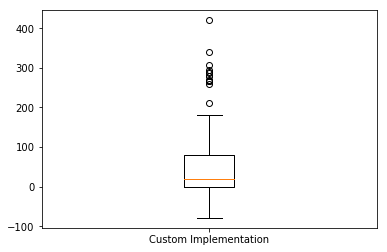

Median of linear:  20.0


In [145]:
plt.figure()
plt.boxplot(nonlinear_confusion, labels=["Custom Implementation"])
plt.show()

print("Median of linear: ", np.median(nonlinear_confusion))

This looks pretty good! We get pretty good performance out of this one! Now let's comapre the performance of both side by side.

#### The Final Showdown

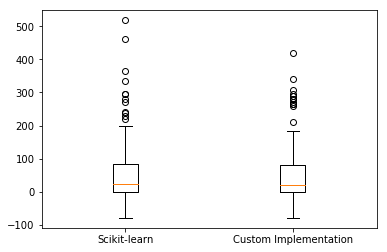

Median of Scikit:  22.0
Mean of scikit 50.45
Median of custom:  20.0
Mean of custom: 49.50625


In [144]:
showdown_list = [sk_confusion_compare, nonlinear_confusion]

plt.figure()
plt.boxplot(showdown_list, labels=["Scikit-learn", "Custom Implementation"])
plt.show()

print("Median of Scikit: ", np.median(sk_confusion_compare))
print("Mean of scikit", np.mean(sk_confusion_compare))
print("Median of custom: ", np.median(nonlinear_confusion))
print("Mean of custom:", np.mean(nonlinear_confusion))

In [143]:
print("time for scikit:", time_scikit, "seconds")
print("time for custom:", time_custom, "seconds")
print("memory for scikit:", mem_scikit[0], "MB")
print("memory for custom", mem_custom[0], "MB")

time for scikit: 2.4481864281988237 seconds
time for custom: 21.085745845542988 seconds
memory for scikit: 113.875 MB
memory for custom 114.2421875 MB


Well, it looks like our custom built MLP does actually perform better than the tried-and-true scikit-learn implementation! Since ours has a lower median, a lower mean, a lower third quartile, a lower top whisker, and lower outliers it is safe to say that our implementation truly has better generalization performance! However the standard scikit MLP model training took much less time than it took to train our custom MLP, by a factor of about 10. This is no surprise since scikit is written in C++ under the hood, and our model contains many for loops and if statements to slow it down. However, the memory usage of the two turns out to be more or less the same. 

All in all it is safe to say that the two implementations fare about the same. Ours has better performance, but their's is faster. It would depend on the application for which one we would want to employ! But either way our implementation was a success!

___

## Exceptional Work
**NB** Our exceptional work is implementing relu and using it to improve the performance of our model. We found that using relu as our nonlinearity was, in fact, a good decision because it did produce the most performant model.

___